In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [316]:
df_dia = pd.read_csv("../data/dynamic/dia/final_table_dia.csv")
df_mercadona = pd.read_csv("../data/dynamic/mercadona/final_table.csv")
num_items_dia = len(df_dia) #no hay completamente todos faltan como de 2 o 3 subcategorias 
df_dia.head()

,Unnamed: 0,Cat,Subcat,url_x,page,brand,display_name,expiration_days,image,object_id,...,is_club_price,is_promo_price,measure_unit,price,price_per_unit,strikethrough_price,id,promotions,average_weight,weight_in_grams
0,0,Charcutería y quesos,"Jamón cocido, lacón, fiambres y mortadela",https://www.dia.es/charcuteria-y-quesos/jamon-...,3,Nuestra Alacena,Pechuga de pavo Nuestra Alacena sobre 2 x 200 g,0,/product_images/273810/273810_ISO_0_ES.jpg,273810,...,False,False,KILO,3.59,8.98,3.59,0,NaN,NaN,NaN
1,1,Charcutería y quesos,"Jamón cocido, lacón, fiambres y mortadela",https://www.dia.es/charcuteria-y-quesos/jamon-...,3,Nuestra Alacena,Jamón cocido extra Nuestra Alacena sobre 2 x 2...,0,/product_images/273957/273957_ISO_0_ES.jpg,273957,...,False,False,KILO,3.52,7.82,3.52,0,NaN,NaN,NaN
2,2,Charcutería y quesos,"Jamón cocido, lacón, fiambres y mortadela",https://www.dia.es/charcuteria-y-quesos/jamon-...,3,Nuestra Alacena,Bacon en tiras Nuestra Alacena bandeja 2 x 100 g,0,/product_images/273750/273750_ISO_0_ES.jpg,273750,...,False,False,KILO,1.68,8.40,1.68,0,NaN,NaN,NaN
3,3,Charcutería y quesos,"Jamón cocido, lacón, fiambres y mortadela",https://www.dia.es/charcuteria-y-quesos/jamon-...,3,Nuestra Alacena,Bacon Nuestra Alacena sobre 200 g,0,/product_images/273749/273749_ISO_0_ES.jpg,273749,...,False,False,KILO,1.99,9.95,1.99,0,NaN,NaN,NaN
4,4,Charcutería y quesos,"Jamón cocido, lacón, fiambres y mortadela",https://www.dia.es/charcuteria-y-quesos/jamon-...,3,Nuestra Alacena,Jamón cocido extra 97% carne Nuestra Alacena s...,0,/product_images/273737/273737_ISO_0_ES.jpg,273737,...,False,False,KILO,1.99,13.27,1.99,0,NaN,NaN,NaN


In [317]:
num_items_mercadona = len(df_mercadona)
df_mercadona["price_per_unit"] = df_mercadona["unit_price"] / df_mercadona["unit_size"]
df_mercadona.head()


,Unnamed: 0,cat1,cat2,id,name,packaging,unit_price,iva,unit_size,size_format,price_decreased,price_per_unit
0,0,"Aceite, especias y salsas","Aceite, vinagre y sal",112,"Aceite de oliva 0,4º Hacendado",Botella,9.25,5,1.00,l,False,9.25
1,1,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Garrafa,29.55,5,3.00,l,False,9.85
2,2,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Botella,9.90,5,1.00,l,False,9.90
3,3,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado Gran Se...,Botella,8.10,5,0.75,l,False,10.80
4,4,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva 1º Hacendado,Garrafa,46.00,5,5.00,l,False,9.20


## Comparacion de el precio de los productos 

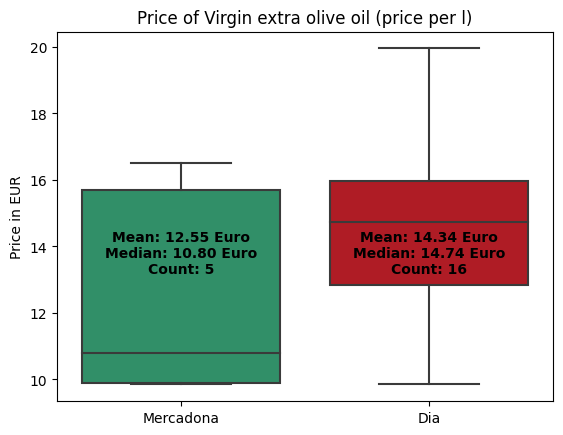

In [318]:
mercadona_aceite = df_mercadona[df_mercadona["name"].str.contains("Aceite de oliva virgen extra", case=True)]
mercadona_aceite_unit_price = mercadona_aceite["price_per_unit"]
mercadona_aceite_m = mercadona_aceite_unit_price.mean()

dia_aceite = df_dia[df_dia["display_name"].str.contains("Aceite de oliva virgen extra", case=True)]
dia_aceite_unit_price = dia_aceite["price_per_unit"]
dia_aceite_m = dia_aceite_unit_price.mean()

aceite_price_per_unit = [mercadona_aceite_unit_price, dia_aceite_unit_price]

a_price = sns.boxplot(aceite_price_per_unit, palette=["#229e6b",'#c8030f'])
a_price.set_xticklabels(["Mercadona", "Dia"])
a_price.set_title("Price of Virgin extra olive oil (price per l)")
a_price.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = aceite_price_per_unit[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    a_price.text(i, 13.8, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='center', color='black', fontsize=10, fontweight='bold')

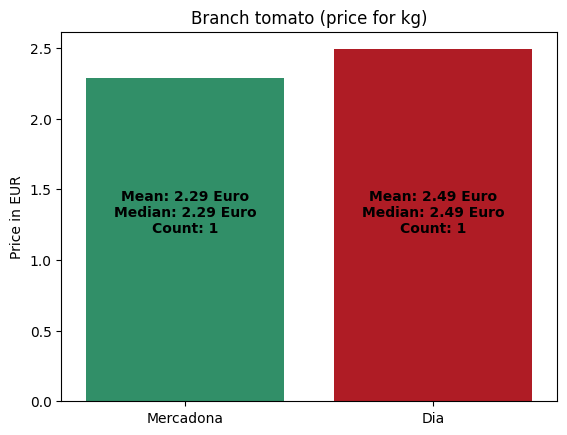

In [319]:
tomate_mercadona = df_mercadona[df_mercadona["name"].str.contains("Rama de Tomates", case=False)]
tomates_price_per_unit_mercadona = tomate_mercadona["price_per_unit"]
mercadona_tomate_m = tomate_dia_price_per_unit.mean()

tomate_dia = df_dia[df_dia["display_name"].str.contains("Tomate en rama granel 500 g", case=False)]
tomate_dia_price_per_unit = tomate_dia["price_per_unit"]
tomate_dia_price_m = tomate_dia_price_per_unit.mean()

tomates_rama = [tomates_price_per_unit_mercadona, tomate_dia_price_per_unit]

tomate_price = sns.barplot(tomates_rama, palette=["#229e6b", '#c8030f'])
tomate_price.set_xticklabels(["Mercadona", "Dia"])
tomate_price.set_title("Branch tomato (price for kg)")
tomate_price.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = tomates_rama[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    tomate_price.text(i, 1.5, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')


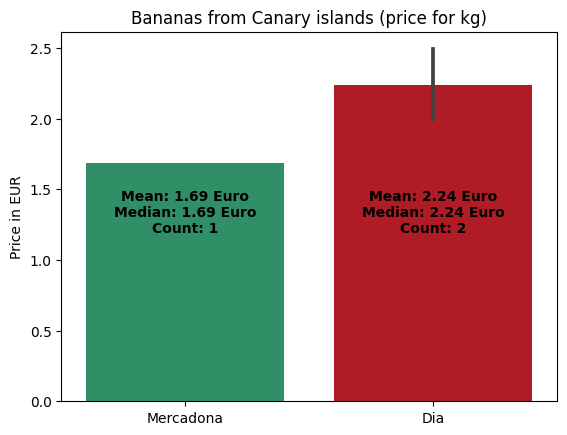

In [320]:
platano_mercadona = df_mercadona[df_mercadona["name"].str.contains("canaria", case=False)]
platano_mercadona_price = platano_mercadona["price_per_unit"]
mercadona_platano_price_m = platano_mercadona_price.mean()

platano_dia = df_dia[df_dia["display_name"].str.contains("canaria", case=False)]
platano_dia_price = platano_dia["price_per_unit"]
dia_platano_price_m = platano_dia_price.mean()

platano_price = [platano_mercadona_price, platano_dia_price]
platano_price_graph = sns.barplot(platano_price, palette=["#229e6b", '#c8030f'])
platano_price_graph.set_xticklabels(["Mercadona", "Dia"])
platano_price_graph.set_title("Bananas from Canary islands (price for kg)")
platano_price_graph.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = platano_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    platano_price_graph.text(i, 1.5, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')

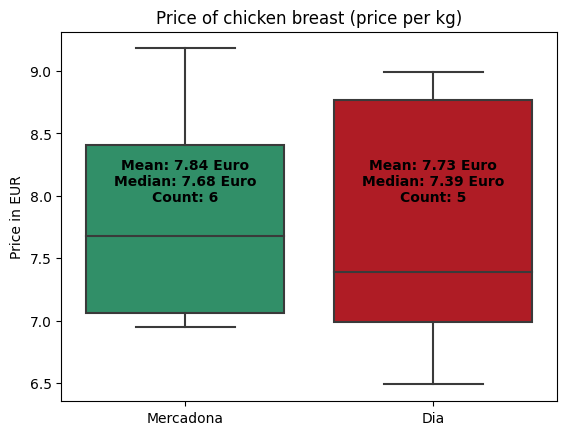

In [321]:
mercadona_pollo = df_mercadona[df_mercadona["name"].str.contains("pechuga de pollo", case=False) & (df_mercadona["packaging"] == "Bandeja")]
price_mercadona_pollo = mercadona_pollo["price_per_unit"]
mercadona_pollo_m = price_mercadona_pollo.mean()

dia_pollo = df_dia[(df_dia["display_name"].str.contains("pechuga de pollo", case=False) | (df_dia["display_name"] == "Pechugas enteras de pollo Selección de Dia bandeja 500 g")) & (df_dia["Cat"] == "Carnicería")]
price_dia_pollo = dia_pollo["price_per_unit"]
dia_pollo_m = price_dia_pollo.mean()

pechuga_pollo_price = (price_mercadona_pollo, price_dia_pollo)

pollo = sns.boxplot(pechuga_pollo_price, palette=["#229e6b",'#c8030f'])
pollo.set_xticklabels(["Mercadona", "Dia"])
pollo.set_title("Price of chicken breast (price per kg)")
pollo.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = pechuga_pollo_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    pollo.text(i, 8.3, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')


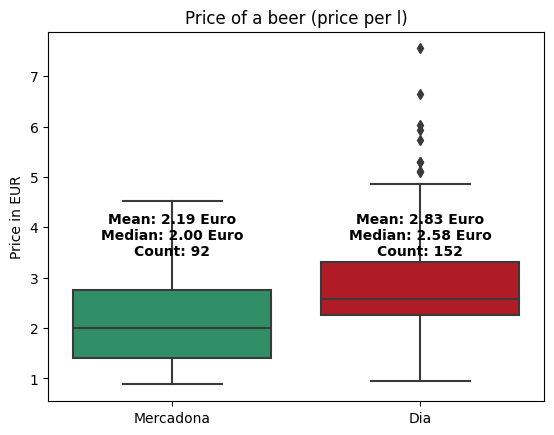

In [322]:
mercadona_cerveza = df_mercadona[df_mercadona["name"].str.contains("Cerveza", case=False)]
mercadona_cerveza_price = mercadona_cerveza["price_per_unit"]
mercadona_cerveza_price_m = mercadona_cerveza_price.mean()

dia_cerveza = df_dia[df_dia["display_name"].str.contains("cerveza", case=False) & (df_dia["Cat"] == "Cervezas, vinos y bebidas con alcohol")]
dia_cerveza_price = dia_cerveza["price_per_unit"]
dia_cerveza_price_m = dia_cerveza_price.mean()

cerveza_price = (mercadona_cerveza_price, dia_cerveza_price)

cerveza = sns.boxplot(cerveza_price, palette=["#229e6b",'#c8030f'])
cerveza.set_xticklabels(["Mercadona", "Dia"])
cerveza.set_title("Price of a beer (price per l)")
cerveza.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = cerveza_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    cerveza.text(i, 4.3, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')


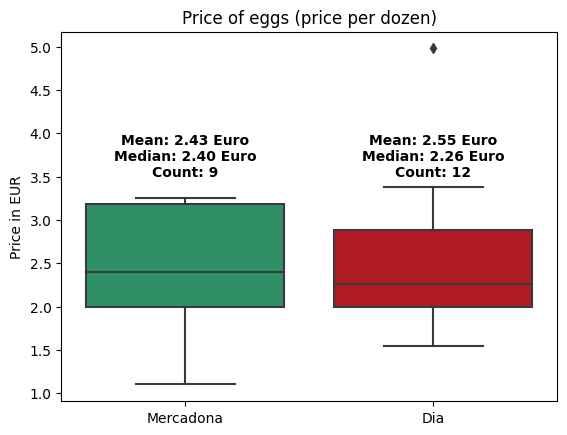

In [323]:
mercadona_eggs = df_mercadona[df_mercadona["name"].str.contains("huevos", case=False) & (df_mercadona["cat1"] == "Huevos, leche y mantequilla")]
mercadona_eggs_price = mercadona_eggs["price_per_unit"] * 12
mercadona_eggs_price_m = mercadona_eggs_price.mean()

dia_eggs = df_dia[df_dia["display_name"].str.contains("huevos", case=False) & (df_dia["Subcat"] == "Huevos")] 
dia_eggs_price = dia_eggs["price_per_unit"]
dia_eggs_price_m = dia_eggs_price.mean()

eggs_price = (mercadona_eggs_price, dia_eggs_price)

eggs = sns.boxplot(eggs_price, palette=["#229e6b",'#c8030f'])
eggs.set_xticklabels(["Mercadona", "Dia"])
eggs.set_title("Price of eggs (price per dozen)")
eggs.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = eggs_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    eggs.text(i, 4, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')


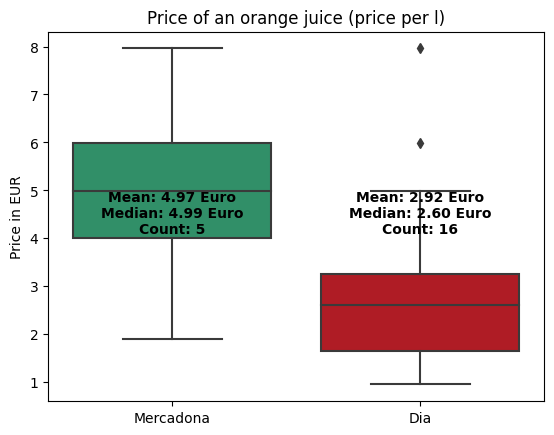

In [324]:
mercadona_zumo_nar = df_mercadona[df_mercadona["name"].str.contains("zumo de naranja", case=False) & (df_mercadona["cat2"] == "Naranja")]
mercadona_zumo_nar_price = mercadona_zumo_nar["price_per_unit"]
mercadona_zumo_nar_price_m = mercadona_zumo_nar_price.mean()

dia_zumo_nar = df_dia[df_dia["display_name"].str.contains("zumo de naranja", case=False)] 
dia_zumo_nar_price = dia_zumo_nar["price_per_unit"]
dia_zumo_nar_price_m = dia_zumo_nar_price.mean()

zumo_price = (mercadona_zumo_nar_price, dia_zumo_nar_price)

zumo = sns.boxplot(zumo_price, palette=["#229e6b",'#c8030f'])
zumo.set_xticklabels(["Mercadona", "Dia"])
zumo.set_title("Price of an orange juice (price per l)")
zumo.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = zumo_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    zumo.text(i, 5, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')




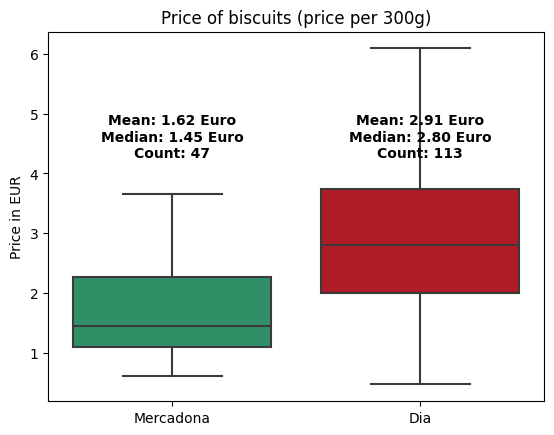

In [325]:
mercadona_galletas = df_mercadona[df_mercadona["name"].str.contains("galletas", case=False) & (df_mercadona["cat2"] == "Galletas")]
mercadona_galletas_price = mercadona_galletas["price_per_unit"] / 3.3333333
mercadona_galletas_price_m = mercadona_galletas_price.mean()

dia_galletas = df_dia[df_dia["display_name"].str.contains("galletas", case=False) & (df_dia["Subcat"] == "Galletas")]
dia_galletas_price = dia_galletas["price_per_unit"] / 3.3333333
dia_galletas_price_m = dia_galletas_price.mean()

galletas_price = (mercadona_galletas_price, dia_galletas_price)

galletas = sns.boxplot(galletas_price, palette=["#229e6b",'#c8030f'])
galletas.set_xticklabels(["Mercadona", "Dia"])
galletas.set_title("Price of biscuits (price per 300g)")
galletas.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = galletas_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    galletas.text(i, 5, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')

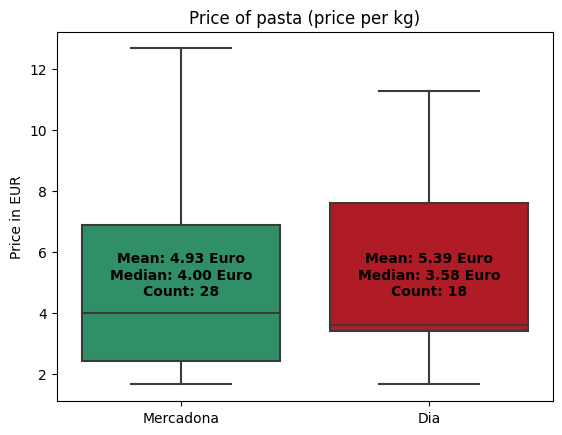

In [326]:
mercadona_pasta = df_mercadona[df_mercadona["name"].str.contains("pasta", case=False) & (df_mercadona["cat2"] == "Pasta y fideos")]
mercadona_pasta_price = mercadona_pasta["price_per_unit"]
mercadona_pasta_price_m = mercadona_pasta_price.mean()

dia_pasta = df_dia[df_dia["display_name"].str.contains("pasta", case=False) & (df_dia["Subcat"] == "Pastas")]
dia_pasta_price = dia_pasta["price_per_unit"]
dia_pasta_price_m = dia_pasta_price.mean()


pasta_price = (mercadona_pasta_price, dia_pasta_price)
pasta = sns.boxplot(pasta_price, palette=["#229e6b",'#c8030f'])
pasta.set_xticklabels(["Mercadona", "Dia"])
pasta.set_title("Price of pasta (price per kg)")
pasta.set_ylabel("Price in EUR")
for i, label in enumerate(["Mercadona", "Dia"]):
    subset_data = pasta_price[i]
    mean_price = np.mean(subset_data)
    median_price = np.median(subset_data)
    num_products = len(subset_data)
    pasta.text(i, 6, f"Mean: {mean_price:.2f} Euro\nMedian: {median_price:.2f} Euro\nCount: {num_products}", 
                 ha='center', va='top', color='black', fontsize=10, fontweight='bold')


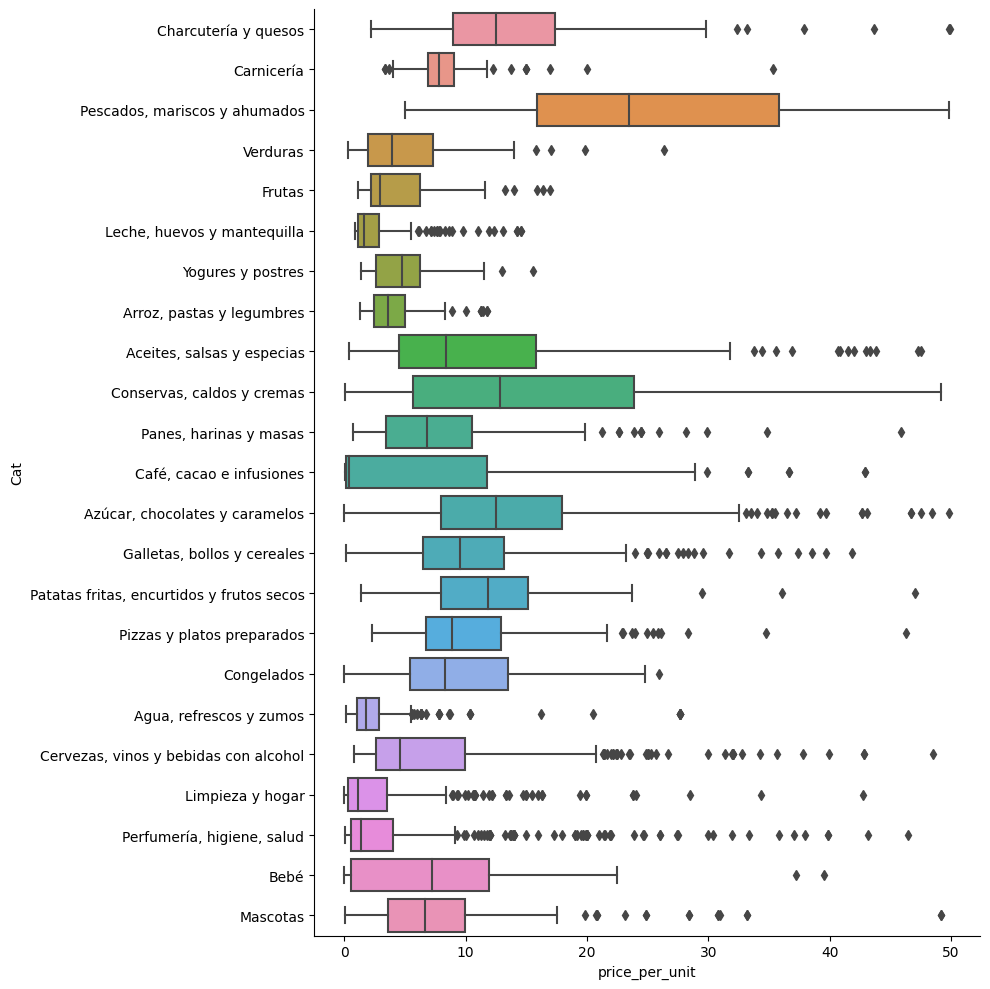

In [347]:
sns.catplot(data=df_dia[df_dia["price_per_unit"]<50], x="price_per_unit", y="Cat", kind="box", height=10)

In [328]:
df_mercadona[~df_mercadona.packaging.isin(["Granel"])].sort_values(by="unit_price", ascending=False)

,Unnamed: 0,cat1,cat2,id,name,packaging,unit_price,iva,unit_size,size_format,price_decreased,price_per_unit
1774,1774,Charcutería y quesos,Jamón serrano,50,Jamón bellota ibérico 100% Covap,Pieza,481.50,10,9.000,kg,False,53.500000
1773,1773,Charcutería y quesos,Jamón serrano,50,Jamón de bellota ibérico 50% La Hacienda del i...,Pieza,391.50,10,9.000,kg,False,43.500000
1772,1772,Charcutería y quesos,Jamón serrano,50,Jamón de cebo ibérico La Hacienda del ibérico,Pieza,129.00,10,8.500,kg,False,15.176471
1741,1741,Charcutería y quesos,Embutido curado,51,Lomo de bellota ibérico Juan del Roble,Pieza,85.50,10,1.900,kg,False,45.000000
1769,1769,Charcutería y quesos,Jamón serrano,50,Jamón serrano gran reserva Noel sin aditivos,Pieza,76.00,10,7.500,kg,False,10.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,Agua y refrescos,Agua,156,Agua mineral pequeña Cortes,Botella,0.22,10,0.500,l,False,0.440000
4500,4500,Panadería y pastelería,Bollería envasada,66,Rollo con sabor avellana Hacendado,NaN,0.21,10,0.042,kg,False,5.000000
4499,4499,Panadería y pastelería,Bollería envasada,66,Rollo con sabor nata Hacendado,NaN,0.21,10,0.042,kg,False,5.000000
4495,4495,Panadería y pastelería,Bollería envasada,66,Rosquillas al cacao Hacendado,NaN,0.19,10,0.037,kg,False,5.135135


<AxesSubplot:title={'center':'Summary of prices per kg or l'}, ylabel='Price in EURO'>

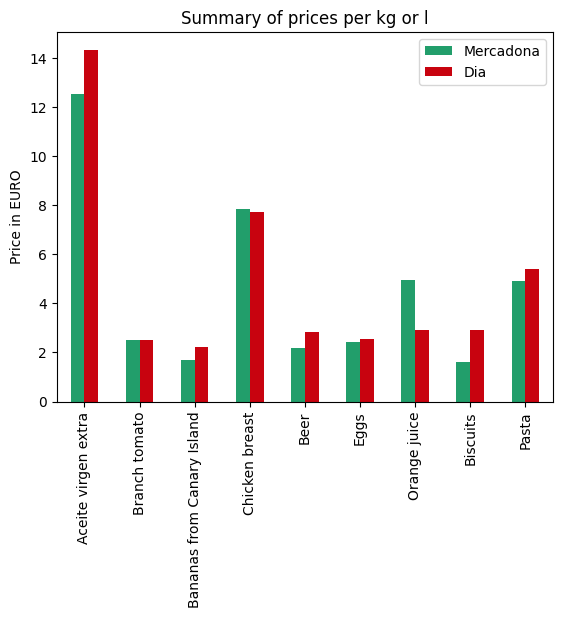

In [329]:
mean_prices = {"Item": ["Aceite virgen extra", "Branch tomato", "Bananas from Canary Island", "Chicken breast", "Beer", "Eggs", "Orange juice", "Biscuits", "Pasta"],
            "Mercadona": [mercadona_aceite_m, mercadona_tomate_m, mercadona_platano_price_m, mercadona_pollo_m, mercadona_cerveza_price_m, mercadona_eggs_price_m, mercadona_zumo_nar_price_m, mercadona_galletas_price_m, mercadona_pasta_price_m],
            "Dia": [dia_aceite_m, tomate_dia_price_m, dia_platano_price_m, dia_pollo_m, dia_cerveza_price_m, dia_eggs_price_m, dia_zumo_nar_price_m, dia_galletas_price_m, dia_pasta_price_m]}

summary = pd.DataFrame(mean_prices, index=["Aceite virgen extra", "Branch tomato", "Bananas from Canary Island", "Chicken breast", "Beer", "Eggs", "Orange juice", "Biscuits", "Pasta"])
summary.plot.bar(color=["#229e6b",'#c8030f'], title="Summary of prices per kg or l", ylabel="Price in EURO")


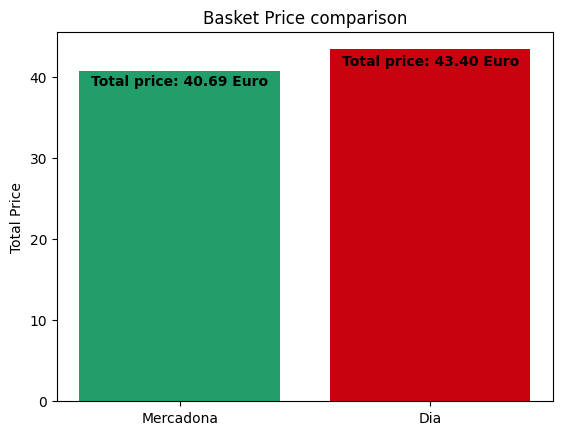

In [344]:
prices_mercadona = [mercadona_aceite_m, mercadona_tomate_m, mercadona_platano_price_m, mercadona_pollo_m, mercadona_cerveza_price_m, mercadona_eggs_price_m, mercadona_zumo_nar_price_m, mercadona_galletas_price_m, mercadona_pasta_price_m]
suma_mercadona = sum(prices_mercadona)

prices_dia = [dia_aceite_m, tomate_dia_price_m, dia_platano_price_m, dia_pollo_m, dia_cerveza_price_m, dia_eggs_price_m, dia_zumo_nar_price_m, dia_galletas_price_m, dia_pasta_price_m]
suma_dia = sum(prices_dia)

final_sum = (suma_mercadona, suma_dia)
labels = ["Mercadona", "Dia"]
colors = ["#229e6b", '#c8030f']

# Creating the bar chart
# plt.figure(figsize=(16, 5))
final_graph = plt.bar(labels, final_sum, color=colors)
plt.title("Basket Price comparison")
plt.ylabel("Total Price")
for i, rect in enumerate(final_graph):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 0.9 , 
                f"Total price: {final_sum[i]:.2f} Euro\n", ha='center', va='bottom', color='black', 
                    fontsize=10, fontweight='bold')
plt.show()


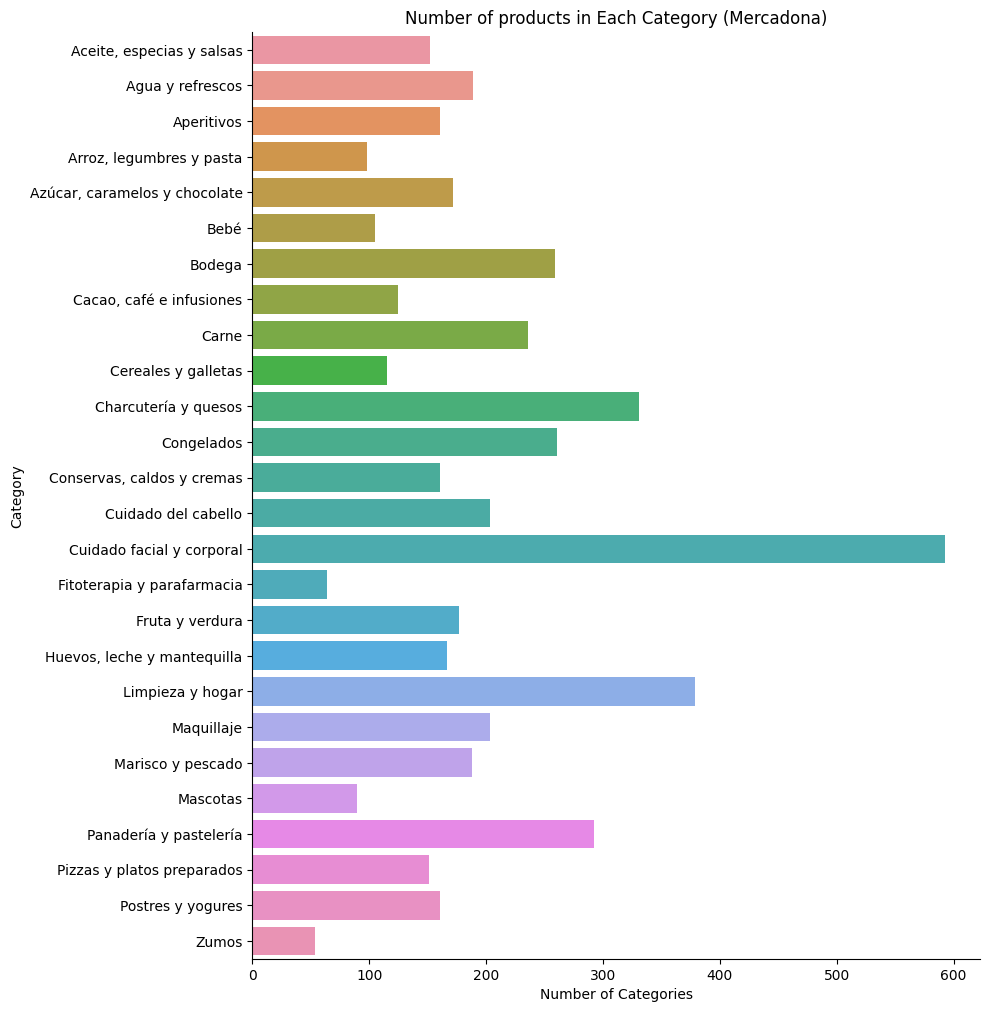

In [397]:
grouped_by_cat1 = df_mercadona.groupby("cat1")
merc_cat1_count = grouped_by_cat1.size()

sns.catplot(data=merc_cat1_count.reset_index(name="count"), x="count", y="cat1", kind="bar", height=10)
plt.xlabel("Number of Categories")
plt.ylabel("Category")
plt.title("Number of products in Each Category (Mercadona)")
plt.show()


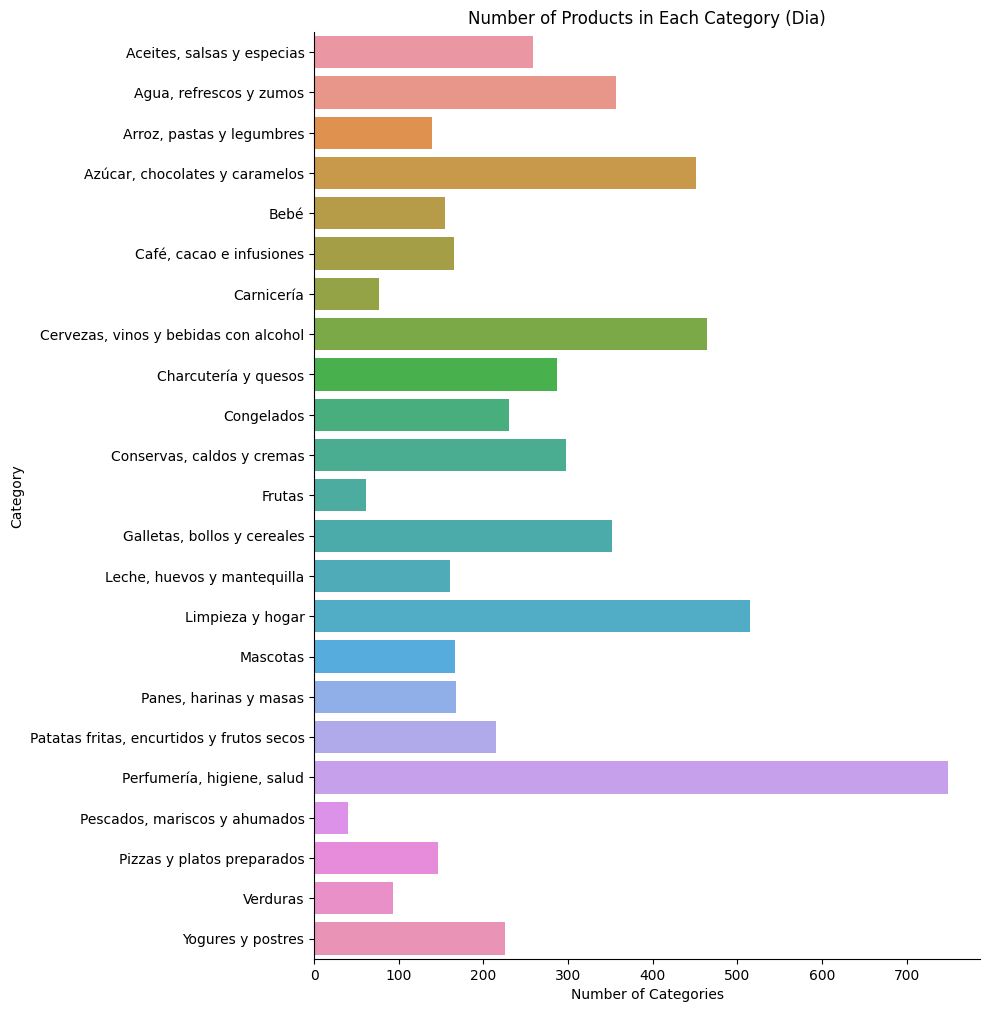

In [398]:
grouped_by_cat = df_dia.groupby("Cat")
dia_cat_count = grouped_by_cat.size()
sns.catplot(data=dia_cat_count.reset_index(name="count"), x="count", y="Cat", kind="bar", height=10)
plt.xlabel("Number of Categories")
plt.ylabel("Category")
plt.title("Number of Products in Each Category (Dia)")
plt.show()

Text(1.0, 1.0, 'Mercadona - Price distribution for each category for prices per unit lower than 50 EURO')

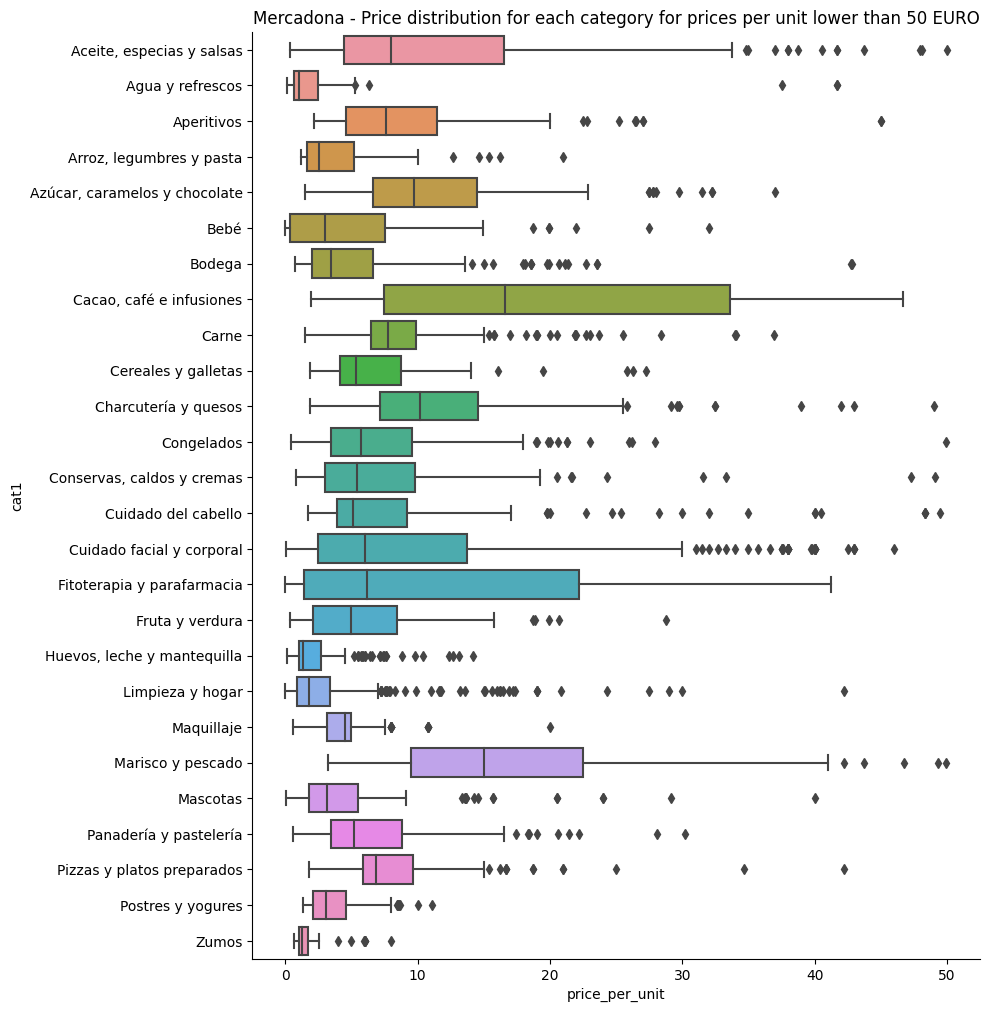

In [405]:
sns.catplot(data=df_mercadona[~df_mercadona.packaging.isin(["Granel", "Pieza"])&(df_mercadona["price_per_unit"]<50)], x="price_per_unit", y="cat1", kind="box", height=10, )
plt.title("Mercadona - Price distribution for each category for prices per unit lower than 50 EURO", loc="right")

Text(1.0, 1.0, 'Dia - Price distribution for each category for prices per unit lower than 50 EURO')

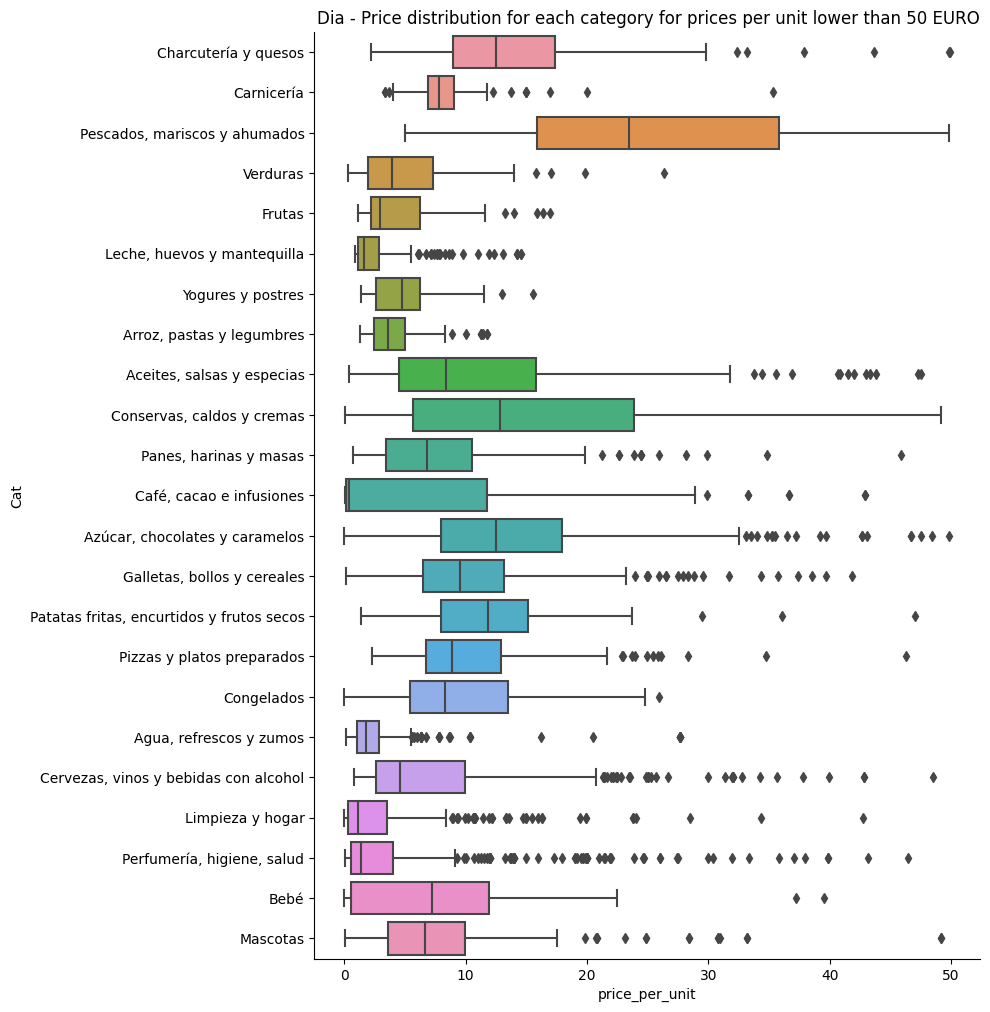

In [411]:
sns.catplot(data=df_dia[df_dia["price_per_unit"]<50], x="price_per_unit", y="Cat", kind="box", height=10)
plt.title("Dia - Price distribution for each category for prices per unit lower than 50 EURO", loc="right")

In [435]:
df_mercadona.head()

,Unnamed: 0,cat1,cat2,id,name,packaging,unit_price,iva,unit_size,size_format,price_decreased,price_per_unit
0,0,"Aceite, especias y salsas","Aceite, vinagre y sal",112,"Aceite de oliva 0,4º Hacendado",Botella,9.25,5,1.00,l,False,9.25
1,1,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Garrafa,29.55,5,3.00,l,False,9.85
2,2,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Botella,9.90,5,1.00,l,False,9.90
3,3,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado Gran Se...,Botella,8.10,5,0.75,l,False,10.80
4,4,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva 1º Hacendado,Garrafa,46.00,5,5.00,l,False,9.20


Text(-431.05555555555554, 0.5, 'Name of the item')

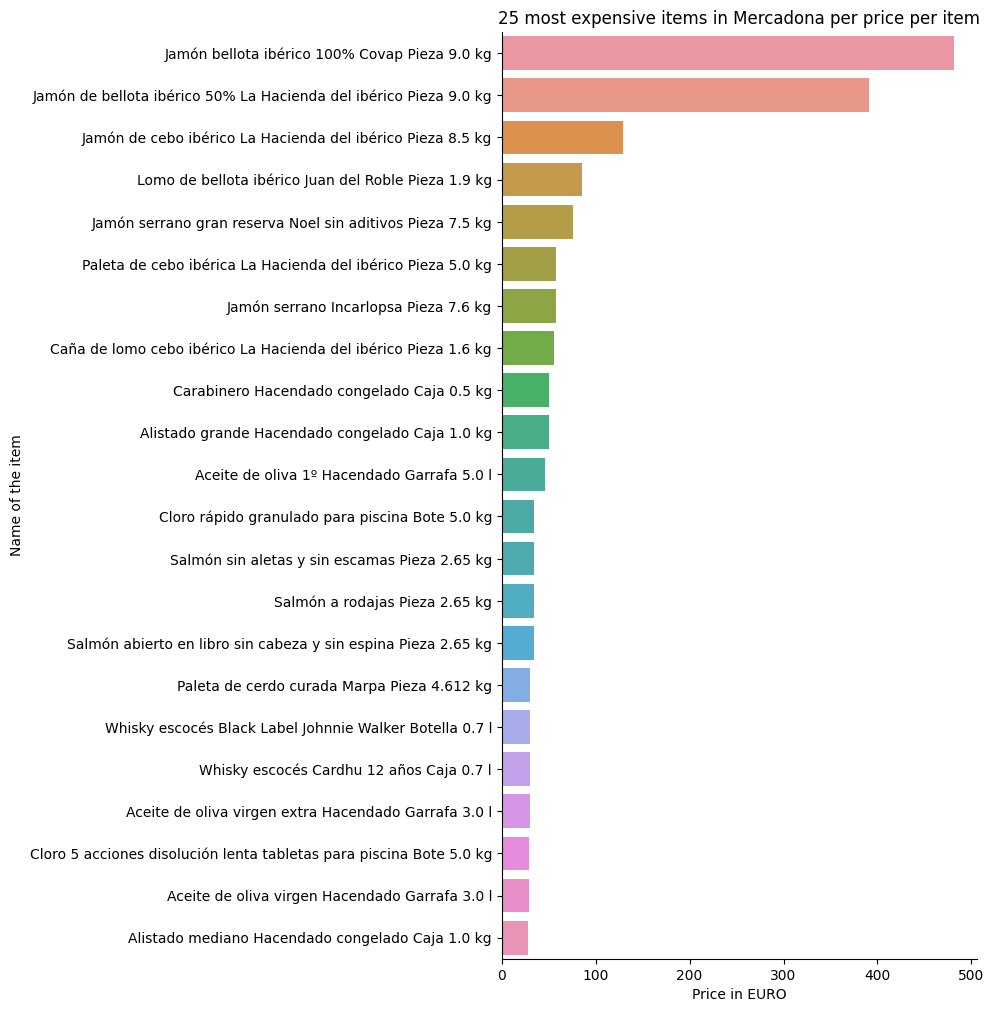

In [446]:
f_mercadona = df_mercadona[~df_mercadona.packaging.isin(["Granel"])].sort_values("unit_price", ascending=False)[:25]
labels = []

for index, row in f_mercadona.iterrows():
    label = f"{row['name']} {row['packaging']} {row['unit_size']} {row['size_format']}"
    labels.append(label)

sns.catplot(x="unit_price", data = f_mercadona, y=labels , kind = "bar", height= 10)

plt.title("25 most expensive items in Mercadona per price per item")
plt.xlabel("Price in EURO")
plt.ylabel("Name of the item")


Text(-531.9305555555555, 0.5, 'Name of the item')

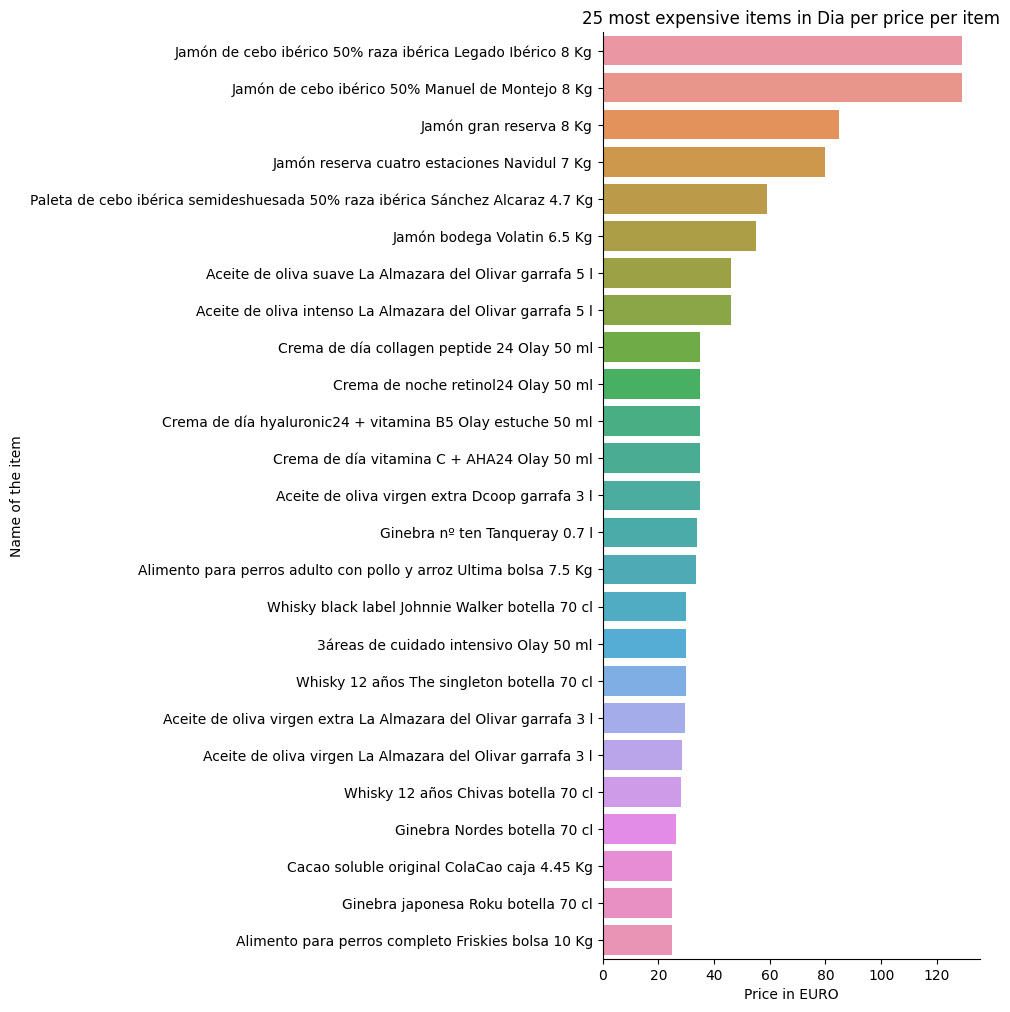

In [434]:
f_dia = df_dia.sort_values("price", ascending=False)[:25]
sns.catplot(x="price", data = f_dia, y="display_name", kind = "bar", height= 10)
plt.title("25 most expensive items in Dia per price per item")
plt.xlabel("Price in EURO")
plt.ylabel("Name of the item")
